# **1. Introduction**




Airbnb adalah platform yang menghubungkan host dan tamu untuk menyewakan akomodasi atau layanan lainnya. Melalui platform ini, host dapat menawarkan berbagai jenis penginapan, seperti rumah pribadi, apartemen, kamar hotel, atau ruang bersama. Host juga dapat memberikan detail tentang lokasi, harga, dan fasilitas yang ditawarkan untuk menarik calon tamu. Airbnb memperoleh pendapatan melalui biaya transaksi dari setiap pemesanan yang berhasil dilakukan.

Analisis data pada platform Airbnb menjadi penting untuk memahami pola okupansi, harga, dan preferensi tamu, yang dapat membantu host mengoptimalkan listing mereka. Dalam studi ini, data yang dianalisis meliputi informasi unik tentang listing, seperti kode ID, nama listing, lokasi geografis (latitude dan longitude), tipe tempat tinggal, harga, dan ulasan. Faktor-faktor seperti jumlah review, harga, dan ketersediaan sepanjang tahun juga akan menjadi fokus untuk mengidentifikasi karakteristik listing yang diminati.

Bangkok, sebagai salah satu destinasi wisata terpopuler di dunia, menawarkan beragam pilihan penginapan melalui Airbnb. Dengan mempertimbangkan lokasi strategis, seperti dekat stasiun BTS, pusat belanja, atau kawasan wisata, listing dapat menarik lebih banyak tamu. Studi ini akan menganalisis data Airbnb di Bangkok untuk mengungkap pola yang memengaruhi keberhasilan listing, termasuk faktor harga, ulasan, tipe akomodasi, dan tingkat ketersediaan.

## **1.1 Business Problem**


- Bagaimana menentukan harga optimal untuk listing Airbnb di Bangkok agar tetap kompetitif tetapi tetap menghasilkan pendapatan maksimal?
- Adakah keyword yang mempengaruhi tingkat popularitas listing? 
- Di wilayah mana listing Airbnb paling laku dan kenapa? 
- Bagaimana pola permintaan terhadap listing Airbnb di Bangkok berubah sepanjang tahun?

# **2. Data Preparation**

## **2.1. Data Understanding**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Airbnb Listings Bangkok.csv")
df.head(3)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0


Terdapat 16 kolom di dalam dataset yang akan digunakan, antara lain:

- id: kode unik untuk setiap listing yang terdaftar di Airbnb
- name: nama dari listing
- host_id: kode unik untuk host
- host_name: nama host (biasanya nama pertama/nama depan)
- neighborhood: lokasi listing (sesuai informasi latitude dan longitude)
- latitude: informasi lokasi di peta
- longitude: informasi lokasi di peta
- room_type: tipe tempat tinggal yang ditawarkan (Private Room, Entire home/apt, Hotel room, Shared Room)
- price: harga dari listing menggunakan dengan nilai mata uang lokal.
- minimum_nights: jumlah hari minimal untuk menyewa listing
- number_of_reviews: jumlah review yang dimiliki listing
- last_review: tanggal dari review terbaru yang masuk
- reviews_per_month: review yang dipunya oleh listing setiap bulannya.
- calculated_host_listings_count: jumlah listing yang dimiliki host di suatu lokasi 
- availability_365: Ketersediaan dari listing x hari kedepan
- number_of_reviews_ltm: Jumlah review yang dimiliki listing dalam 12 bulan terakhir

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Data Kategori:

- room_type
- name
- host_name
- neighbourhood
- last_review


Data Numerik:

- Unnamed
- id
- host_id
- latitude
- longitude
- price
- minimum_nights
- number_of_reviews
- reviews_per_month
- calculated_host_listing_count
- availability_365
- number_of_reviews_ltm


terdapat 15854 baris dan 17 kolom. namun,  terdapat variable unnamed yang dianggap sebagai kekeliryan input, selanjutkan akan di drop karena tidak akan dipakai untuk keperluan analisa. jenis variable last_review juga harus diubah ke variable datetime 



In [4]:
df = df.drop(columns='Unnamed: 0')
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [5]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

terdapat data kosong pada variable:
- name : 8 data kosong
- host_name : 1 data kosong
- last_review  : 5790 data kosong
- reviews_per_month : 5790 data kosong

yang nantinya, akan diisi atupun di drop sesuai dengan kebutuhan.

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Berdasarkan informasi statistik deskriptif di atas, terdapat beberapa anomali pada variabel seperti price, minimum_nights, dan lainnya.

Sebagai contoh, pada variabel price, nilai minimumnya tercatat sebagai 0, yang tidak masuk akal karena tidak mungkin sebuah penginapan menawarkan harga gratis. 

Selain itu, nilai maksimumnya memiliki perbedaan yang sangat signifikan, mencapai tiga kali lipat dari nilai pada 75% sebaran data (Q3), sementara rentang antara nilai minimum hingga Q3 bahkan tidak mencapai dua kali lipat.

Kondisi serupa juga ditemukan pada variabel number_of_reviews, di mana terdapat perbedaan mencolok antara nilai Q3 dan nilai maksimum.

In [7]:
price_min = df[df["price"] == df["price"].min()]
price_min

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


In [8]:
price_max = df[df["price"] == df["price"].max()]
price_max

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,NaN,NaN,1,365,0


In [9]:
mn_max = df[df["minimum_nights"] == df["minimum_nights"].max()]
mn_max

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0


In [10]:
# Cek data unik di tiap kolom
tabeluniq = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Unique': df.nunique(),
    'Unique Sample': df.apply(lambda col: col.unique()[:5])  # Menampilkan 5 contoh nilai unik
})

tabeluniq


,Column Name,Number of Unique,Unique Sample
id,id,15854,"[27934, 27979, 28745, 35780, 941865]"
name,name,14794,"[Nice room with superb city view, Easy going l..."
host_id,host_id,6659,"[120437, 120541, 123784, 153730, 610315]"
host_name,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem]"
neighbourhood,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
latitude,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
longitude,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
room_type,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
price,price,3040,"[1905, 1316, 800, 1286, 1000]"
minimum_nights,minimum_nights,86,"[3, 1, 60, 7, 250]"


Secara umum, dapat disimpulkan bahwa:

- Dataset Airbnb untuk Bangkok terdiri dari 17 kolom dan 15.854 baris.
- Kolom **price** memiliki satu nilai minimum yang tercatat sebagai 0, yang diduga akibat kesalahan saat input data.
- Pada kolom **name**, jumlah baris tidak sesuai dengan jumlah baris maksimum, yang mungkin disebabkan oleh kesalahan dalam proses input data.
- Lokasi listing (neighbourhood) tersebar di 50 area berbeda di Bangkok.
- Jumlah listing yang dimiliki oleh host yang sama bervariasi, mulai dari 1 hingga 228 listing di Bangkok.
- Kolom **name**, **last_review**, dan **reviews_per_month** memiliki jumlah nilai yang kurang dari 15.854 baris, yang menunjukkan adanya data yang hilang atau kosong.

In [11]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [12]:
# Persentase missing value di setiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

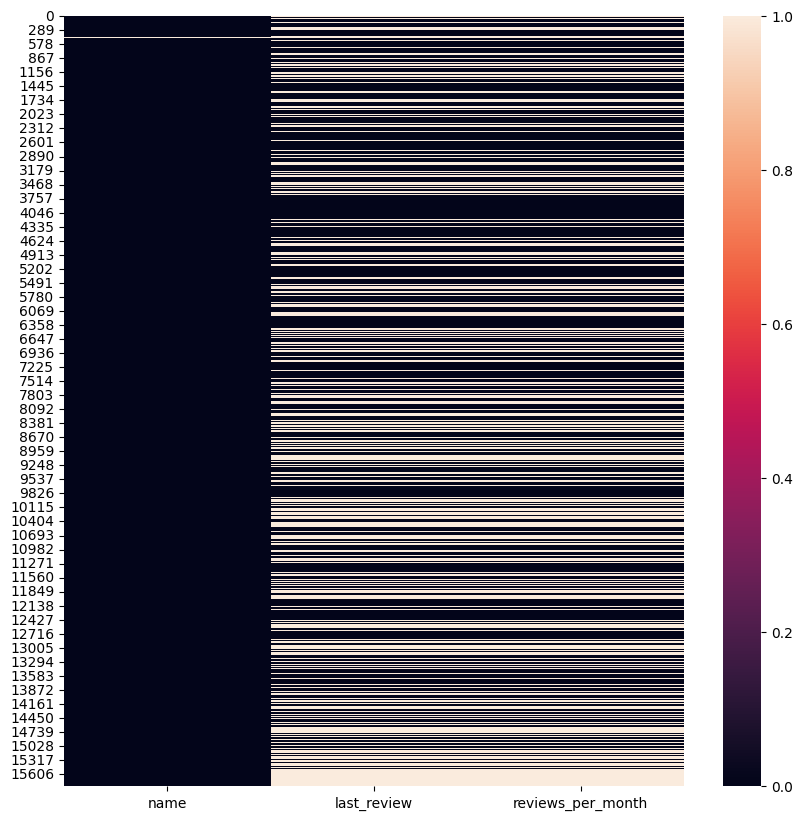

In [13]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','last_review','reviews_per_month']].isna())

Secara umum:

- **Missing value** pada kolom **name** memiliki proporsi yang sangat kecil (0,050460).
- **Missing value** pada kolom **last_review** memiliki proporsi yang sangat tinggi (36,520752).
- **Missing value** di kolom **last_review** berkaitan dengan kolom **number_of_reviews**. Jika nilai pada kolom **number_of_reviews** adalah 0 (tidak ada ulasan), maka nilai di kolom **last_review** akan kosong.
- **Missing value** pada kolom **reviews_per_month** memiliki proporsi yang sama dengan kolom **last_review** (36,520752) karena kolom **reviews_per_month** berhubungan langsung dengan kolom **last_review**.

Ada dua pendekatan untuk menangani missing value:

1. Menghapus baris atau kolom yang berisi missing value. Pendekatan ini biasanya tidak disarankan jika jumlah missing value cukup tinggi (dalam hal ini sekitar 36% dari data).
   
2. Mengisi data yang hilang. Pendekatan ini lebih disarankan karena tidak mengurangi jumlah data. Metode ini bisa digunakan untuk kolom **name** yang kosong, karena nilai kosong pada kolom ini diasumsikan sebagai kesalahan input yang bisa diterima. Kolom **last_review** juga akan diisi dengan nilai yang menandakan tidak adanya data, bukan dengan NaN.

melihat lebih detail kolom-kolom yang disebutkan secara garis besar sebelumnya:

1) no name

In [14]:
# Data yang memiliki nilai kosong pada variable 'name'
df_noname = df[df['name'].isna()]
df_noname[['name', 'host_name', 'number_of_reviews']]

,name,host_name,number_of_reviews
439,NaN,Titawan,0
544,NaN,Cherry,0
572,NaN,Parichart,0
669,NaN,Chira,0
1030,NaN,Nantida,0
1282,NaN,Diamond Bangkok,6
1594,NaN,Khaneungnit,0
2075,NaN,Pakaphol,2


Di sini, dapat di lihat bahwa pada kolom **host_name**, Diamond Bangkok dan Pakhapol memiliki nilai pada jumlah ulasan, yang menunjukkan bahwa penginapan tersebut pernah memiliki transaksi yang menghasilkan ulasan meskipun tidak memiliki nama. Hal ini juga mengindikasikan kemungkinan adanya kesalahan saat input data, serta mungkin menunjukkan bahwa pendaftaran nama listing tidak wajib di layanan Airbnb.

2) Hubungan number_of_reviews, last_review dan reviews_per_month



In [15]:
# Menampilkan data yang memiliki lebih dari 0 review
df.loc[df['number_of_reviews'] != 0, ['number_of_reviews', 'last_review', 'reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month
0,65,2020-01-06,0.50
3,2,2022-04-01,0.03
5,19,2017-08-03,0.17
6,1,2014-02-03,0.01
8,10,2016-03-29,0.09
...,...,...,...
15712,1,2022-12-25,1.00
15728,1,2022-12-26,1.00
15743,3,2022-12-24,3.00
15744,3,2022-12-28,3.00


In [16]:
# Menampilkan data yang memiliki 0 review
df.loc[df['number_of_reviews'] == 0, ['number_of_reviews', 'last_review', 'reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month
1,0,NaN,NaN
2,0,NaN,NaN
4,0,NaN,NaN
7,0,NaN,NaN
14,0,NaN,NaN
...,...,...,...
15849,0,NaN,NaN
15850,0,NaN,NaN
15851,0,NaN,NaN
15852,0,NaN,NaN


Berdasarkan data di atas, dapat disimpulkan bahwa nilai kosong pada kolom last_review disebabkan oleh listing yang memang belum menerima ulasan (number_of_reviews = 0), begitu pula dengan reviews_per_month, yang saling terkait dengan kolom last_review.

## **2.2 Data Cleaning**

### Missing Value

Setelah melihat gambaran umum data beserta anomali yang ada, langkah selanjutnya adalah menangani missing values pada kolom **name** dan **last_review**, serta menghapus kolom yang tidak relevan untuk analisis, seperti kolom **Unnamed** yang berisi indeks, **reviews_per_month**, dan nilai 0 pada kolom **price**.

1) mengubah noname menjadi anonime dan data kosong di **last_review** dan **reviews_per_month** menjadi sesuai dengan korelasi **number_of_review**

In [17]:
df['name'].fillna('Anonim', inplace = True)
df[df['name'] == 'Anonim']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,Anonim,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,Anonim,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,Anonim,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,Anonim,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,Anonim,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,Anonim,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,Anonim,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,Anonim,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [18]:
df["last_review"] = df.apply(lambda row: 0 if row["number_of_reviews"] == 0 else row["last_review"], axis=1)

In [19]:
df["reviews_per_month"] = df.apply(lambda row: 0 if row["number_of_reviews"] == 0 else row["reviews_per_month"], axis=1)

2) menghapus nan host_name

In [20]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [21]:
#koordinat 
cozy_hideaway_lat = 13.76999
cozy_hideaway_lon = 100.63769

# Menggunakan .loc untuk menyaring lokasi terdekat
nearby_locations = df.loc[
    (df['latitude'] >= cozy_hideaway_lat - 0.0005) & 
    (df['latitude'] <= cozy_hideaway_lat + 0.0005) & 
    (df['longitude'] >= cozy_hideaway_lon - 0.0005) & 
    (df['longitude'] <= cozy_hideaway_lon + 0.0005)
]
nearby_locations


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0
6255,30071703,Comfortable flat near Veijthani Hospital (65 sqm),225326584,KimBuay,Bang Kapi,13.77036,100.63778,Entire home/apt,1296,6,9,2022-11-24,0.18,1,151,6



Hasil analisis menunjukkan bahwa nilai kosong pada kolom `host_name` tidak memiliki hubungan atau kesamaan dengan listing terdekat. Mengingat proporsi data yang hilang di kolom ini kurang dari 10%, maka langkah paling tepat adalah menghapus listing tersebut dari dataset.

In [22]:

df = df.dropna(subset=['host_name'])

In [23]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Data Duplicate

In [24]:
df.duplicated().sum()

np.int64(0)

Jika dilihat dari keseluruhan data, tidak ditemukan adanya duplikasi.  

Namun, perlu dilakukan pengecekan lebih spesifik menggunakan kolom longitude dan latitude untuk mendeteksi potensi duplikasi. Hal ini penting karena jika longitude dan latitude memiliki nilai yang sama, ada kemungkinan listing berada di lokasi dan lantai yang sama, meskipun atribut lainnya mungkin berbeda.  

Sebagai langkah tambahan,  memeriksa atribut lain seperti `name`, `room_type`, atau `price` jika ditemukan longitude dan latitude yang sama. Hal ini untuk memastikan apakah listing tersebut benar-benar duplikat atau merupakan unit yang berbeda di lokasi yang sama.

In [25]:
# Mencari baris duplikat langsung tanpa menambah kolom
duplicate_rows = df[df.duplicated(subset=['name', 'latitude', 'longitude', 'room_type', 'price'], keep=False)]

# Menampilkan duplikasi
duplicate_rows


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
486,4639962,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,27,2022-07-11,0.28,12,364,1
1162,7717620,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,20,2019-08-08,0.30,12,364,0
2119,13777582,"Studio with Zen garden view (30sqm), LUXX Silom",68154488,Dusadee,Bang Rak,13.726330,100.525310,Hotel room,1777,1,1,2017-03-18,0.01,62,271,0
3329,18396802,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.739370,100.555210,Entire home/apt,2470,2,63,2022-01-14,0.93,13,325,1
3473,19000129,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.739370,100.555210,Entire home/apt,2470,2,71,2022-12-26,1.06,13,343,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,780866818159850652,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,264864968,Tricia,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,0,0.00,44,360,0
15614,780889390373160493,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,344327171,Alice,Huai Khwang,13.757097,100.568486,Entire home/apt,2533,3,0,0,0.00,40,360,0
15615,780896408611028752,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,344327171,Alice,Huai Khwang,13.757097,100.568486,Entire home/apt,2533,3,0,0,0.00,40,360,0
15829,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,0,0.00,14,360,0


In [26]:
df[df['name']=='Family Room for 4 People']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
10826,43284894,Family Room for 4 People,340188343,Rachan,Vadhana,13.740603,100.556081,Private room,2720,1,0,0,0.0,14,360,0
15829,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,0,0.0,14,360,0
15831,790280473547745220,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,0,0.0,14,360,0


In [27]:
# Filter untuk mendapatkan baris unik berdasarkan kombinasi kolom
df = df.drop_duplicates(subset=['name', 'latitude', 'longitude', 'room_type', 'price'], keep='first').reset_index(drop=True)


In [28]:
df[df['name']=='Family Room for 4 People']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
10816,43284894,Family Room for 4 People,340188343,Rachan,Vadhana,13.740603,100.556081,Private room,2720,1,0,0,0.0,14,360,0
15786,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,0,0.0,14,360,0


In [29]:
df.shape

(15810, 16)

Sebelum proses pembersihan data, dataset memiliki 15.854 baris dan 17 kolom, dengan beberapa masalah seperti nilai kosong pada kolom *name* dan *last_review*, serta nilai 0 pada kolom *price*.  

Setelah dilakukan pembersihan data, jumlah baris berkurang menjadi 15.810, dan jumlah kolom menjadi 16 setelah menghapus kolom yang tidak relevan. Nilai kosong, duplikat, serta anomali pada data telah ditangani sehingga dataset siap untuk dianalisis lebih lanjut.

### outliers

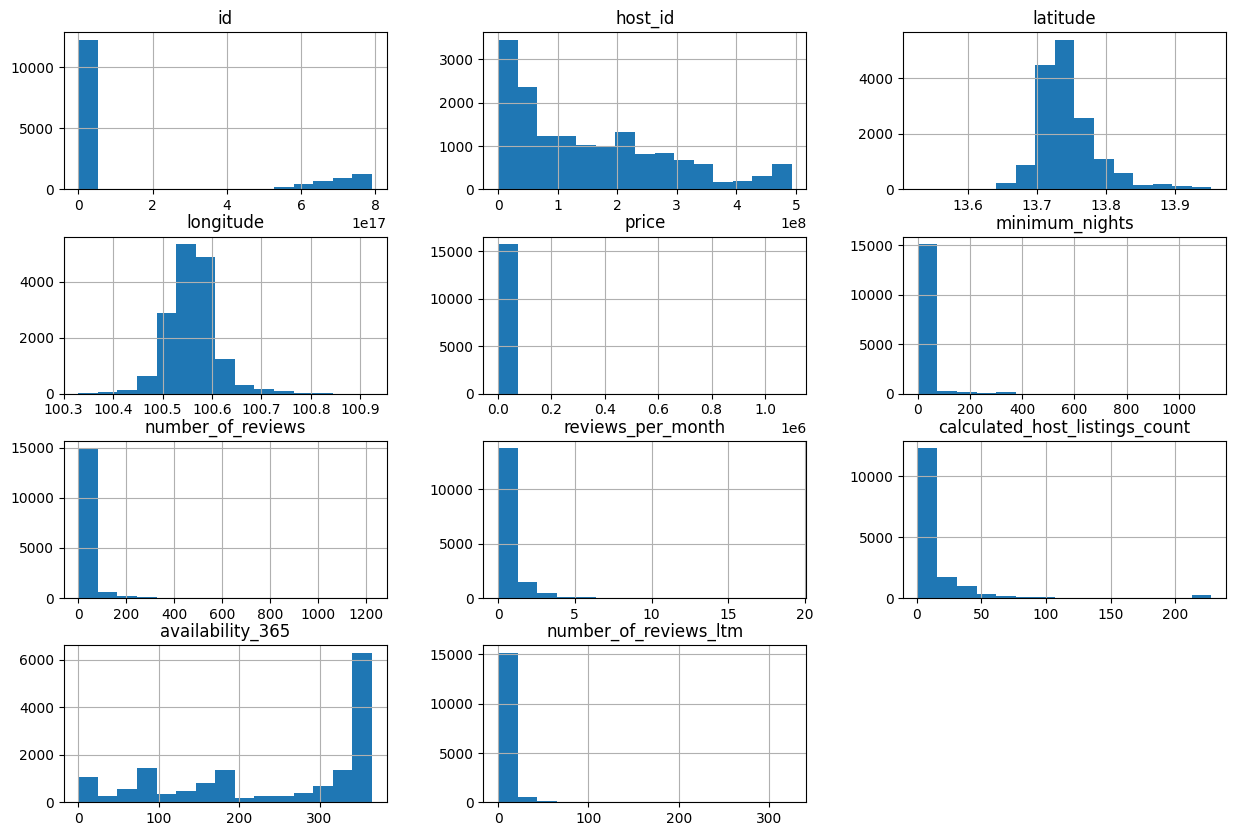

In [30]:
df.hist(bins=15, figsize=(15,10));

Pada histogram di atas, terlihat bahwa beberapa variabel tidak terdistribusi secara normal. Hal ini akan menjadi pertimbangan dalam memilih metode korelasi yang tepat untuk analisis ini.

### price outlier

### segmentasi outlierr berdasarkan room type dan price

In [31]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

<Axes: xlabel='room_type', ylabel='price'>

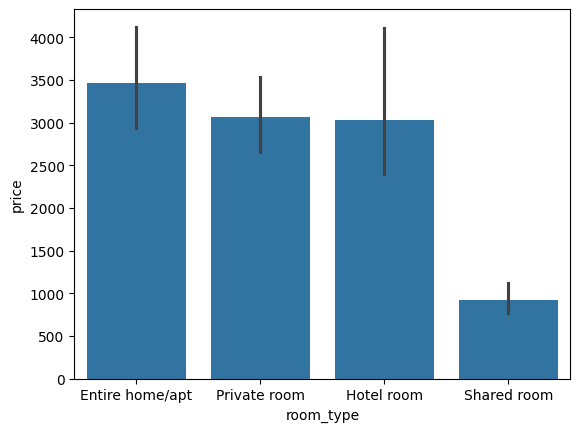

In [32]:
sns.barplot(df, x="room_type", y="price", estimator="mean")

<Axes: xlabel='room_type', ylabel='price'>

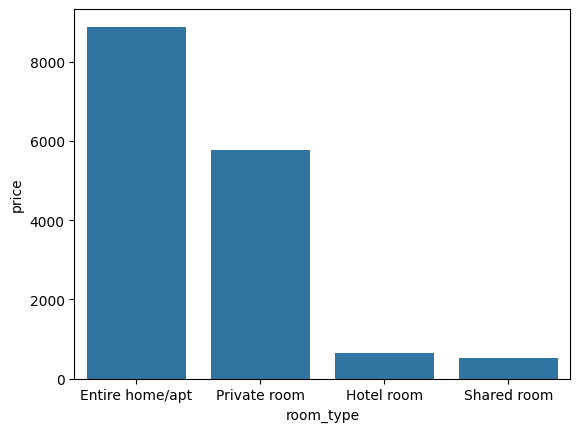

In [33]:
sns.barplot(df, x="room_type", y="price", estimator=len)

In [34]:
df[df["price"] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11093,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0.0,1,0,0


In [35]:
# Hitung median untuk baris yang memenuhi kondisi
median_price = df[(df["neighbourhood"] == "Vadhana") & (df["room_type"] == "Hotel room")]["price"].median()

# Ganti nilai price yang 0 dengan median
df.loc[(df["price"] == 0) & (df["neighbourhood"] == "Vadhana") & (df["room_type"] == "Hotel room"), "price"] = median_price


In [36]:
df["price"].min()

np.int64(278)

sudah tidak ada lagi nilai 0 pada price

In [37]:
df.groupby('room_type').size().reset_index(name='count')

,room_type,count
0,Entire home/apt,8880
1,Hotel room,647
2,Private room,5761
3,Shared room,522


In [38]:
df.groupby('room_type')['price'].max()

room_type
Entire home/apt    1100000
Hotel room          300000
Private room        600700
Shared room          31200
Name: price, dtype: int64

In [39]:
df.groupby('room_type')['price'].min()

room_type
Entire home/apt    332
Hotel room         318
Private room       278
Shared room        280
Name: price, dtype: int64

#### handling outlier

1) Menggunakan Boxplot: Boxplot merupakan cara visual untuk melihat distribusi data dan mendeteksi outlier berdasarkan kuartil (Q1, Q3) dan nilai IQR (Interquartile Range).

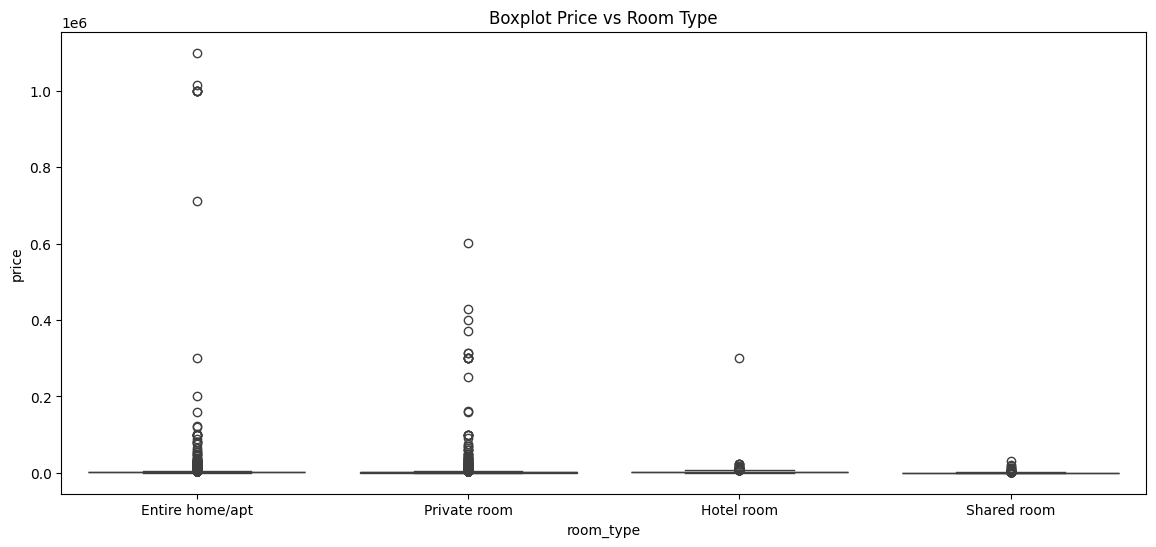

In [40]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Boxplot Price vs Room Type')
plt.show()


- Terlihat ada beberapa outliers di kolom 'price', terutama di tipe Entire home/apt.
- banyak hargba dia tas upperbound yang disebabkan oleh beberapa hal, seperti host yang mungkin mmeberikan harga terlalu tinggiatau rendah. maka oulier tidak di handling terlebih dahulu, dilakukan naliisi terlebih dahulu.

2) Menggunakan IQR (Interquartile Range): menghitung rentang interkuartil dan mendeteksi nilai yang berada di luar rentang ini sebagai outlier.

In [41]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers[['room_type', 'price']])


             room_type   price
17     Entire home/apt  122594
18     Entire home/apt    5680
19     Entire home/apt    5034
34     Entire home/apt    5429
48     Entire home/apt    8658
...                ...     ...
15713  Entire home/apt   17900
15714     Private room   17900
15722  Entire home/apt    7589
15723  Entire home/apt    7589
15724  Entire home/apt    8900

[1397 rows x 2 columns]


In [42]:
mean = df['price'].mean()
median = df['price'].median()
print(f"Mean: {mean}, Median: {median}")


Mean: 3221.2771030993044, Median: 1426.0


Berdasarkan hasil:

- Mean: 3221.12
- Median: 1425.5

Karena mean > median, data tersebut cenderung skewed ke kanan (positively skewed). Artinya, ada beberapa nilai yang sangat besar (outlier) yang menarik rata-rata ke atas

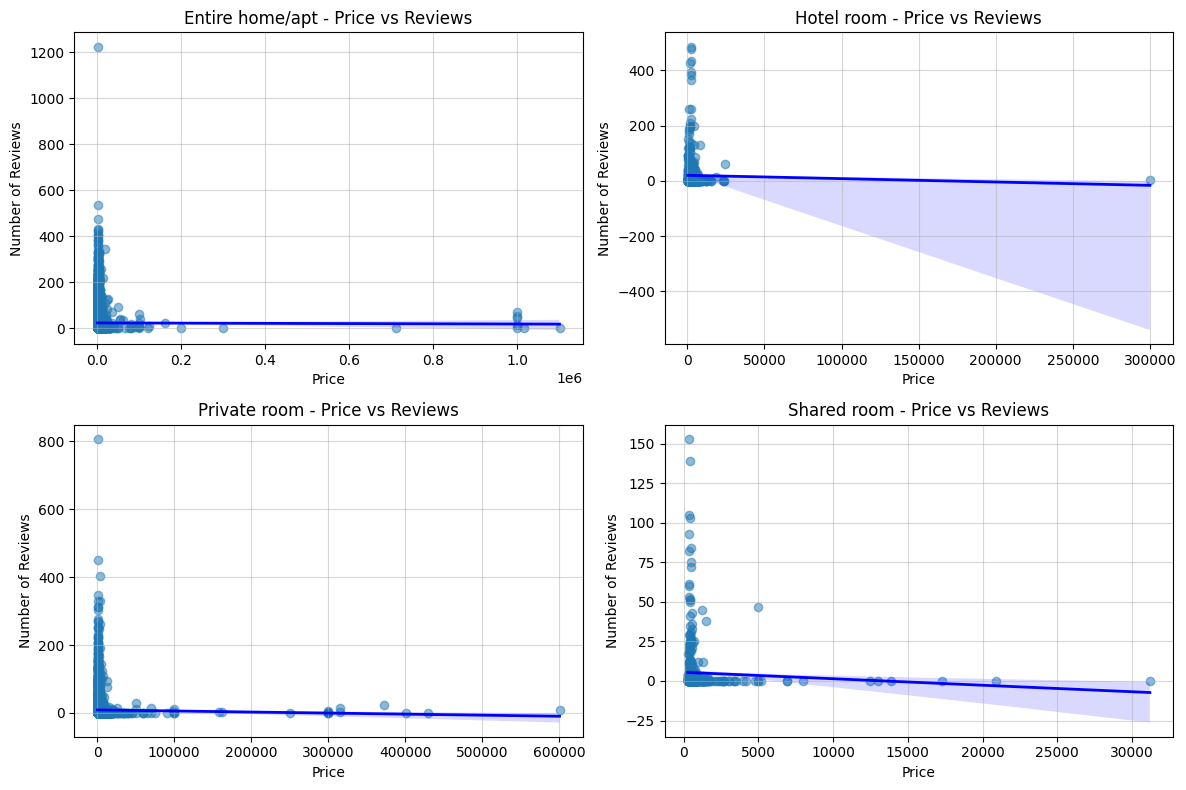

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat plot scatter dengan regresi untuk setiap room type
room_types = df['room_type'].unique()
plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    plt.subplot(2, 2, i)  # Subplot grid 2x2
    subset = df[df['room_type'] == room_type]
    
    sns.regplot(
        x='price',
        y='number_of_reviews',
        data=subset,
        scatter_kws={'alpha': 0.5},  # Transparansi scatter
        line_kws={'color': 'blue', 'linewidth': 2}  # Garis regresi
    )
    
    plt.title(f'{room_type} - Price vs Reviews', fontsize=12)
    plt.xlabel('Price', fontsize=10)
    plt.ylabel('Number of Reviews', fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


### data after cleaning

In [43]:
print("=== Data Overview After Cleaning ===")
print("\nStatistik Deskriptif:")
print(df.describe())

print("\nNilai yang Hilang:")
print(df.isnull().sum())

print("\nJumlah Data Unik:")
print(df.nunique())

print("\nSampel Data:")
print(df.head())

print("\nJumlah Outlier yang Tersisa:")
outliers_remaining = outliers
print(outliers_remaining.shape[0])


=== Data Overview After Cleaning ===

Statistik Deskriptif:
                 id       host_id      latitude     longitude         price  \
count  1.581000e+04  1.581000e+04  15810.000000  15810.000000  1.581000e+04   
mean   1.567705e+17  1.539636e+08     13.745165    100.559912  3.221277e+03   
std    2.937073e+17  1.318812e+08      0.043048      0.050954  2.500672e+04   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  2.780000e+02   
25%    2.104504e+07  3.974431e+07     13.720143    100.529690  9.000000e+02   
50%    3.501342e+07  1.223632e+08     13.738515    100.561430  1.426000e+03   
75%    5.231426e+07  2.386197e+08     13.759530    100.585190  2.443000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15810.000000       15810.000000       15810.000000   
mean        15.328843          16.689311           0.515448   
std         50.880514          40.66031

#### Exporting Cleaned Data

In [44]:
df.to_csv('cleaned_airbnb_listingbangkok.csv', index=False)

# **3. Data Analysis**
* **
- Data visualization
- Insight

## **1. harga Optimal**

Harga optimal dapat ditentukan dengan membandingkan harga yang ada dalam rentang yang memiliki jumlah ulasan terbanyak. Rentang harga ini mencerminkan preferensi mayoritas pengguna dan memberikan indikasi harga yang paling diterima oleh pasar. Dengan demikian, harga optimal merupakan titik keseimbangan antara daya tarik harga dan permintaan konsumen berdasarkan ulasan yang paling sering diterima.

In [45]:
# Mengelompokkan data berdasarkan jenis kamar dan menghitung kuartil dan persentil untuk setiap grup
grouped = df.groupby('room_type')

# Fungsi untuk mengkategorikan harga berdasarkan kuartil dan persentil untuk tiap grup
def categorize_price_by_group(group):
    Q1 = group['price'].quantile(0.25)
    Q2 = group['price'].quantile(0.50)  # Median
    Q3 = group['price'].quantile(0.75)
    Q4 = group['price'].quantile(0.95)  # 95th Percentile

    def categorize_price(price):
        if price <= Q1:
            return 'Sangat Rendah'
        elif Q1 < price <= Q2:
            return 'Rendah'
        elif Q2 < price <= Q3:
            return 'Menengah'
        elif Q3 < price <= Q4:
            return 'Tinggi'
        else:
            return 'Sangat Tinggi'
    
    group['price_category'] = group['price'].apply(categorize_price)
    return group

# Terapkan fungsi ke setiap grup
df = grouped.apply(categorize_price_by_group)

# Hapus indeks tambahan yang dibuat oleh apply
df.reset_index(drop=True, inplace=True)

# Menampilkan data dengan kategori harga berdasarkan jenis kamar
print(df[['room_type', 'price', 'price_category']].head())


         room_type  price price_category
0  Entire home/apt   1905       Menengah
1  Entire home/apt   1000  Sangat Rendah
2  Entire home/apt   1461         Rendah
3  Entire home/apt   1558       Menengah
4  Entire home/apt   1893       Menengah


In [46]:
df['price_category']

0             Menengah
1        Sangat Rendah
2               Rendah
3             Menengah
4             Menengah
             ...      
15805           Tinggi
15806           Tinggi
15807           Tinggi
15808           Tinggi
15809           Rendah
Name: price_category, Length: 15810, dtype: object

In [47]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'price_category'],
      dtype='object')

In [48]:
df["price"].min()

np.int64(278)

In [49]:
df["price"].max()

np.int64(1100000)

In [50]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Menengah
1,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,Sangat Rendah
2,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,0,0.00,1,365,0,Rendah
3,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,Menengah
4,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.77486,100.54272,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1,Menengah


In [51]:
review_kategori = df.groupby('price_category').agg(
    {'number_of_reviews':'sum',
     'number_of_reviews_ltm':'sum'})
review_kategori.sort_values(by="number_of_reviews",ascending=False)

,number_of_reviews,number_of_reviews_ltm
price_category,,
Rendah,73630,13752
Menengah,67738,16498
Sangat Rendah,67484,10753
Tinggi,45872,11901
Sangat Tinggi,9134,2203


In [52]:
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].quantile(0.50)  # Median
Q3 = df['price'].quantile(0.75)
Q4 = df['price'].quantile(0.95)

In [53]:
# Buat range harga per kategori
price_ranges = {
        'Sangat Rendah': f"<= {Q1:.2f}",
        'Rendah': f"{Q1:.2f} - {Q2:.2f}",
        'Menengah': f"{Q2:.2f} - {Q3:.2f}",
        'Tinggi': f"{Q3:.2f} - {Q4:.2f}",
        'Sangat Tinggi': f"> {Q4:.2f}",
    }

# Menambahkan kolom 'price_range' berdasarkan 'price_category'
df['price_range'] = df['price_category'].map(price_ranges)

# Mengelompokkan data berdasarkan 'room_type' untuk menemukan kategori harga dengan jumlah ulasan terbanyak
optimal_prices = df.loc[df.groupby('room_type')['number_of_reviews'].idxmax().dropna()]

# Membuat ringkasan hasil
summary = optimal_prices[['room_type', 'price_category', 'price_range', 'number_of_reviews', 'number_of_reviews_ltm']].reset_index(drop=True)

# Mengurutkan hasil berdasarkan jumlah ulasan (opsional)
summary = summary.sort_values(by='number_of_reviews', ascending=False)

summary

,room_type,price_category,price_range,number_of_reviews,number_of_reviews_ltm
0,Entire home/apt,Menengah,1426.00 - 2443.00,1224,109
2,Private room,Rendah,900.00 - 1426.00,807,146
1,Hotel room,Menengah,1426.00 - 2443.00,486,6
3,Shared room,Sangat Rendah,<= 900.00,153,7




### **1. Harga Optimal Berdasarkan Tipe Kamar**
- **Entire home/apt** memiliki kategori harga **Menengah** dengan rentang **1426.00 - 2443.00**, yang juga mendapatkan jumlah ulasan terbanyak (1224 ulasan). Hal ini menunjukkan bahwa harga dalam rentang tersebut adalah optimal untuk tipe kamar ini.
  
- **Private room** memiliki kategori harga **Rendah** dengan rentang **900.00 - 1426.00**. Dengan jumlah ulasan sebanyak 807, rentang harga ini cocok untuk menarik penyewa yang mencari opsi lebih terjangkau.

- **Hotel room** juga berada di kategori **Menengah** dengan rentang harga **1426.00 - 2443.00**, namun dengan jumlah ulasan jauh lebih sedikit (hanya 486 ulasan). Ini menunjukkan bahwa hotel room mungkin kurang kompetitif di segmen harga ini.

- **Shared room** berada dalam kategori **Sangat Rendah** dengan harga di bawah **900.00**. Meskipun harganya rendah, tipe ini hanya mendapatkan 153 ulasan, sehingga mungkin perlu strategi pemasaran tambahan untuk meningkatkan peminat.

---

### **2. Korelasi Antara Kategori Harga dan Jumlah Ulasan**
- Tipe kamar dengan jumlah ulasan terbanyak berada di kategori harga yang lebih rendah hingga menengah (**Sangat Rendah**, **Rendah**, dan **Menengah**). Ini menunjukkan bahwa penyewa cenderung memilih opsi dengan harga yang terjangkau.

- Kategori harga yang lebih tinggi (misalnya, harga di atas 2443.00) tidak muncul dalam data, yang mungkin menandakan kurangnya daya tarik pada segmen tersebut.




## **2. Keyword yang mempengaruhi**

Analisis kata kunci pada judul listing dapat membantu mengidentifikasi faktor-faktor yang memengaruhi tingkat popularitas, seperti kata yang sering muncul pada judul properti yang banyak mendapatkan ulasan  atau sering dipilih oleh pengguna.

Melakukan pemisah kata per kata pada judul listing memungkinkan untuk menemukan pola atau keyword yang sering muncul pada judul properti dengan rating tinggi, yang dapat menunjukkan apa yang dicari oleh konsumen atau apa yang mereka anggap penting.


In [54]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,price_range
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Menengah,1426.00 - 2443.00
1,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,Sangat Rendah,<= 900.00
2,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,0,0.00,1,365,0,Rendah,900.00 - 1426.00
3,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,Menengah,1426.00 - 2443.00
4,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.77486,100.54272,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1,Menengah,1426.00 - 2443.00


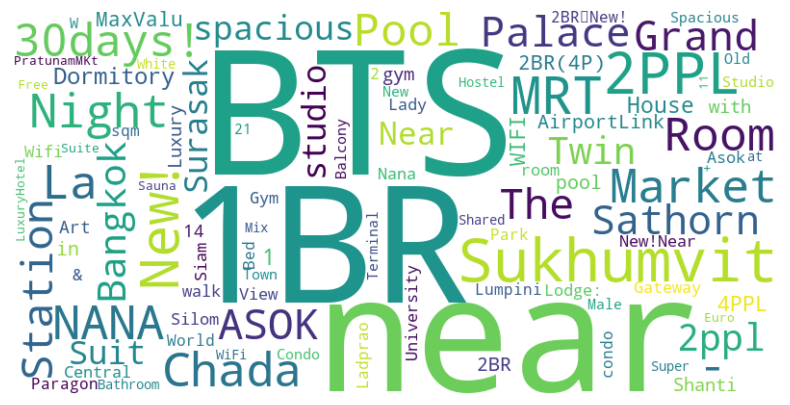

In [55]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menghitung jumlah ulasan untuk tiap listing
review_counts = df.groupby('name').size()

# Mengambil 100 listing dengan jumlah ulasan terbanyak
top_100_reviews = review_counts.sort_values(ascending=False).head(100).index

# Memfilter data untuk 100 top listing
top_100_listing_names = df[df['name'].isin(top_100_reviews)]['name']

# Membagi teks di kolom 'name' ke dalam kata-kata menggunakan regex
text_split = top_100_listing_names.apply(lambda x: re.split(r'[ ,;./]', x))

# Menyebarkan kata-kata dari list menjadi baris terpisah
exploded_text = text_split.explode()

# Menghitung frekuensi kata-kata
word_count = exploded_text.value_counts().drop(index='').head(100)

# Menyiapkan data untuk word cloud
words = word_count.index
count = word_count.values
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, count)))

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.show()



### 1. **Kata-Kata yang Terkait dengan Lokasi:**
   - **Sukhumvit, Paragon, Pratunam, Sathorn, Silom, Siam, Lumpini, Surasak**: 
     - Ini adalah nama-nama lokasi yang biasanya merujuk ke distrik atau area terkenal di Bangkok, Thailand. Kata-kata ini menunjukkan bahwa banyak listing berada di area sentral atau kawasan populer yang sering dicari oleh wisatawan atau penduduk lokal.
     - Kata-kata seperti "Sukhumvit", "Siam", dan "Silom" sering dikaitkan dengan pusat perbelanjaan, hiburan, dan kehidupan kota yang dinamis.

### 2. **Kata-Kata yang Terkait dengan Aksesibilitas dan Transportasi:**
   - **BTS, Station**: 
     - BTS (Bangkok Skytrain) adalah sistem transportasi utama di Bangkok. Kata ini menunjukkan bahwa listing mungkin dekat dengan stasiun BTS, yang merupakan fitur penting bagi mereka yang mencari akses mudah ke transportasi umum.
     - "Station" menunjukkan kedekatan dengan stasiun transportasi, seperti stasiun kereta api atau bus.

### 3. **Kata-Kata yang Terkait dengan Fasilitas:**
   - **Pool, Gym, Balcony, Wifi**:
     - Kata-kata ini menunjukkan fasilitas yang tersedia di properti tersebut. Misalnya, "Pool" dan "Gym" menunjukkan bahwa tempat tersebut menyediakan fasilitas olahraga dan relaksasi, yang sangat dicari oleh para penyewa atau pengunjung yang mengutamakan kenyamanan.
     - "Wifi" adalah fasilitas penting yang menunjukkan ketersediaan koneksi internet, yang kini menjadi standar di hampir semua properti sewaan atau hotel.
     - "Balcony" adalah fitur populer di apartemen dan hotel yang menawarkan pemandangan luar ruangan atau tempat bersantai.

### 4. **Kata-Kata yang Terkait dengan Tempat atau Aktivitas Rekreasi:**
   - **Market, Park**:
     - "Market" menunjukkan kedekatan dengan pasar atau tempat belanja yang mungkin penting bagi mereka yang mencari pengalaman lokal atau kemudahan membeli barang kebutuhan sehari-hari.
     - "Park" menunjukkan kedekatan dengan area hijau, taman kota, atau ruang terbuka, yang mungkin dicari oleh orang-orang yang menginginkan lingkungan yang lebih tenang atau ruang untuk bersantai.

### 5. **Kata-Kata yang Mencerminkan Ketenangan dan Relaksasi:**
   - **Shanti**:
     - Kata ini berarti "kedamaian" atau "ketenangan", yang bisa mencerminkan tempat yang menawarkan suasana yang lebih santai, misalnya, sebuah tempat penginapan dengan nuansa ketenangan atau meditasi.

### 6. **Insight Secara Umum:**
   - Banyak kata yang muncul berkaitan dengan **lokasi pusat kota** dan **fasilitas yang nyaman**. Ini menunjukkan bahwa listing yang populer mungkin berlokasi di kawasan yang mudah diakses, dekat dengan transportasi umum (seperti BTS), serta menawarkan berbagai fasilitas yang meningkatkan kenyamanan seperti kolam renang, gym, balkon, dan Wi-Fi.
   - **Tempat wisata** seperti pasar dan taman juga muncul, yang menunjukkan bahwa banyak listing yang menarik bagi wisatawan atau orang-orang yang mencari kenyamanan dan kemudahan di sekitar tempat-tempat populer.
   - Kata-kata yang berhubungan dengan kedamaian dan ketenangan, seperti "Shanti", mungkin lebih sering digunakan dalam konteks akomodasi yang menyasar orang yang mencari ketenangan di tengah keramaian kota.

## **3. Wilayah Terlaku di Bangkok**

Wilayah terlaku di Bangkok ditentukan berdasarkan lima besar jumlah ulasan terbanyak pada masing-masing *neighborhood*. Data menunjukkan bahwa area-area ini memiliki tingkat aktivitas dan popularitas tinggi, baik dari sisi kunjungan maupun interaksi pengguna. Analisis ini membantu mengidentifikasi wilayah dengan potensi besar untuk pengembangan layanan atau bisnis. Wilayah-wilayah ini juga mencerminkan preferensi wisatawan dan penduduk lokal dalam memilih lokasi yang diminati.

In [57]:
import folium
from IPython.display import IFrame

In [58]:
import folium
print(folium.__version__)

0.18.0


In [59]:
# Filter listing dengan jumlah review terbanyak untuk setiap neighbourhood
top_reviews_per_neighbourhood = df.loc[
    df.groupby('neighbourhood')['number_of_reviews'].idxmax()
]

# Ambil 5 listing dengan review terbanyak dari neighbourhood yang sudah difilter
top_5_neighbourhood_reviews = top_reviews_per_neighbourhood.nlargest(5, 'number_of_reviews')

# Buat peta dasar
map_bangkok_top5 = folium.Map(location=[13.7563, 100.5018], zoom_start=12)

# Tambahkan marker untuk setiap listing
for _, row in top_5_neighbourhood_reviews.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"<b>{row['name']}</b><br>"
            f"Neighbourhood: {row['neighbourhood']}<br>"
            f"Reviews: {row['number_of_reviews']}<br>"
            f"Price: {row['price']} THB"
        ),
        icon=folium.Icon(color="blue", icon="star")
    ).add_to(map_bangkok_top5)

map_bangkok_top5


In [60]:
# Ambil 5 listing dengan review terbanyak
top_5_reviews = df.nlargest(5, 'number_of_reviews')

# Buat peta dasar
map_bangkok_top5 = folium.Map(location=[13.7563, 100.5018], zoom_start=12)

# Tambahkan marker untuk setiap listing
for _, row in top_5_reviews.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"<b>{row['name']}</b><br>"
            f"Neighbourhood: {row['neighbourhood']}<br>"
            f"Reviews: {row['number_of_reviews']}<br>"
            f"Price: {row['price']} THB"
        ),
        icon=folium.Icon(color="blue", icon="star")
    ).add_to(map_bangkok_top5)

# Tampilkan peta
map_bangkok_top5

In [61]:
# Group by 'neighbourhood' and calculate the sum of 'number_of_reviews' and mean of 'price'
top_5_neighbourhood_by_reviews = df.groupby('neighbourhood').agg({
    'number_of_reviews': 'sum',
    'latitude': 'mean',
    'longitude' : 'mean',
    'price': 'mean'
    
}).sort_values(by='number_of_reviews', ascending=False).head(5).reset_index()

# Membulatkan rata-rata harga
top_5_neighbourhood_by_reviews['price'] = top_5_neighbourhood_by_reviews['price'].round(2)
top_5_neighbourhood_by_reviews

,neighbourhood,number_of_reviews,latitude,longitude,price
0,Khlong Toei,41151,13.723070,100.572969,4259.86
1,Vadhana,37414,13.734650,100.574610,4456.03
2,Sathon,22239,13.715804,100.529292,2342.68
3,Ratchathewi,20677,13.752987,100.543585,3205.04
4,Huai Khwang,18145,13.765798,100.576874,5042.78


In [62]:
# Group by 'neighbourhood' and calculate the sum of 'number_of_reviews' and mean of 'price'
top_5_neighbourhood_by_reviews = df.groupby('neighbourhood').agg({
    'number_of_reviews': 'sum',
    'latitude': 'mean',
    'longitude': 'mean',
    'price': 'mean'
}).sort_values(by='number_of_reviews', ascending=False).head(5).reset_index()

# Membulatkan rata-rata harga
top_5_neighbourhood_by_reviews['price'] = top_5_neighbourhood_by_reviews['price'].round(2)

# Tambahkan kolom price_category berdasarkan kuartil rata-rata harga

def categorize_price(price):
    if price <= Q1:
        return 'Sangat Rendah'
    elif Q1 < price <= Q2:
        return 'Rendah'
    elif Q2 < price <= Q3:
        return 'Menengah'
    elif Q3 < price <= Q4:
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

# Terapkan kategori harga pada rata-rata harga di top_5_neighbourhood_by_reviews
top_5_neighbourhood_by_reviews['price_category'] = top_5_neighbourhood_by_reviews['price'].apply(categorize_price)

# Hasil akhir
print(top_5_neighbourhood_by_reviews)


  neighbourhood  number_of_reviews   latitude   longitude    price  \
0   Khlong Toei              41151  13.723070  100.572969  4259.86   
1       Vadhana              37414  13.734650  100.574610  4456.03   
2        Sathon              22239  13.715804  100.529292  2342.68   
3   Ratchathewi              20677  13.752987  100.543585  3205.04   
4   Huai Khwang              18145  13.765798  100.576874  5042.78   

  price_category  
0         Tinggi  
1         Tinggi  
2       Menengah  
3         Tinggi  
4         Tinggi  


In [63]:

# Buat peta dasar
map_bangkok_top5_neighbourhood = folium.Map(location=[13.7563, 100.5018], zoom_start=12)

# Tambahkan marker untuk setiap listing
for _, row in top_5_neighbourhood_by_reviews.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"Neighbourhood: {row['neighbourhood']}<br>"
            f"Reviews: {row['number_of_reviews']}<br>"
            f"Mean Price: {row['price']} THB <br>"
            f"Catagory Price: {row['price_category']}"
         ),
        icon=folium.Icon(color="blue", icon="star")
    ).add_to(map_bangkok_top5_neighbourhood)


# Tampilkan peta
map_bangkok_top5_neighbourhood

In [64]:
df.loc[
    df.groupby('neighbourhood')['number_of_reviews'].count().sort_values(ascending=False)
].sort_values(by='number_of_reviews', ascending=False).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,price_range
32,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.71192,100.51535,Entire home/apt,866,2,472,2022-12-15,4.02,7,320,29,Sangat Rendah,<= 900.00
23,1862089,❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,1200,1,419,2022-12-07,3.77,37,355,1,Rendah,900.00 - 1426.00
55,413824,❂100% Private&Central Light EnSuite,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,800,1,325,2020-03-14,2.67,37,358,0,Sangat Rendah,<= 900.00
149,909514,Newly Renovated 3BR Suite 146sqm BTS Thonglo,4877320,Nisa,Vadhana,13.73958,100.58650,Entire home/apt,4720,2,252,2020-02-23,2.11,2,347,0,Tinggi,2443.00 - 6777.60
1109,13129286,CBD 1minBTS 215SQM Amazing Complex FREE WIFI+POOL,39744308,Ed,Bang Rak,13.72480,100.53024,Entire home/apt,3983,1,236,2022-09-24,2.94,12,252,12,Tinggi,2443.00 - 6777.60


<Axes: xlabel='neighbourhood', ylabel='number_of_reviews'>

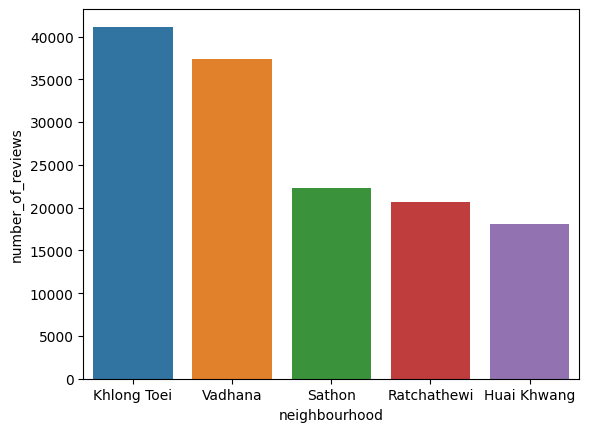

In [65]:
sns.barplot(top_5_neighbourhood_by_reviews, x='neighbourhood', y= 'number_of_reviews', hue='neighbourhood')

Berdasarkan grafik jumlah ulasan per *neighbourhood* di Bangkok, berikut adalah beberapa *insight* yang dapat diambil:

1. **Khlong Toei** adalah wilayah dengan jumlah ulasan tertinggi, mencapai lebih dari 40.000 ulasan. Ini menunjukkan bahwa Khlong Toei memiliki tingkat aktivitas yang sangat tinggi, kemungkinan besar karena daya tariknya yang signifikan bagi wisatawan atau penduduk lokal.

2. **Vadhana** berada di posisi kedua dengan jumlah ulasan mendekati 40.000, menjadikannya salah satu wilayah yang juga populer di Bangkok. Wilayah ini mungkin memiliki daya tarik serupa dengan Khlong Toei, seperti fasilitas wisata, akomodasi, atau pusat aktivitas sosial.

3. **Sathon, Ratchathewi, dan Huai Khwang** menempati posisi tiga hingga lima, dengan jumlah ulasan yang cukup signifikan tetapi lebih rendah dibandingkan dua wilayah teratas. Ini menunjukkan bahwa meskipun masih populer, wilayah-wilayah ini memiliki daya tarik yang lebih spesifik atau terbatas dibandingkan dengan Khlong Toei dan Vadhana.

4. **Peluang pengembangan**: Wilayah-wilayah dengan jumlah ulasan tinggi mencerminkan potensi untuk pengembangan layanan atau investasi, seperti peningkatan fasilitas wisata atau akomodasi.

5. **Preferensi pengguna**: Data ini juga mengindikasikan preferensi wisatawan atau pengguna terhadap wilayah tertentu di Bangkok, yang dapat menjadi bahan pertimbangan untuk strategi pemasaran atau pengembangan bisnis.

Berikut adalah beberapa kemungkinan mengapa wilayah-wilayah tersebut banyak diminati untuk bisnis, berdasarkan wawasan bisnis dan potensi ekonomi:

1. **Khlong Toei**:  
   - **Pusat Aktivitas Ekonomi**: Khlong Toei terkenal sebagai area dengan pasar besar (Khlong Toei Market) dan pelabuhan utama Bangkok. Aktivitas ekonomi yang padat menarik banyak wisatawan dan penduduk lokal.  
   - **Akses Strategis**: Wilayah ini memiliki akses yang baik ke pusat transportasi dan jaringan jalan utama, menjadikannya lokasi ideal untuk berbagai bisnis, termasuk akomodasi dan restoran.  

2. **Vadhana**:  
   - **Area Modern dan Dinamis**: Vadhana adalah pusat hiburan dan kehidupan malam di Bangkok, dengan banyak bar, kafe, dan pusat perbelanjaan. Ini menjadikannya wilayah yang menarik bagi generasi muda dan wisatawan.  
   - **Akomodasi Premium**: Wilayah ini menawarkan banyak opsi akomodasi modern, termasuk hotel dan apartemen servis, yang membuatnya populer bagi pelancong bisnis dan wisatawan internasional.  

3. **Sathon**:  
   - **Pusat Keuangan**: Sathon merupakan kawasan bisnis utama di Bangkok, yang dipenuhi dengan gedung pencakar langit, kantor perusahaan multinasional, dan bank. Wilayah ini menarik banyak pelancong bisnis dan ekspatriat.  
   - **Kemewahan dan Infrastruktur**: Kehadiran hotel bintang lima dan restoran mewah menjadikan Sathon pilihan utama bagi wisatawan premium.  

4. **Ratchathewi**:  
   - **Dekat dengan Atraksi Utama**: Wilayah ini berada dekat dengan pusat perbelanjaan populer seperti Siam Paragon dan MBK Center, serta memiliki akses ke BTS Skytrain.  
   - **Fasilitas Akomodasi Terjangkau**: Ratchathewi menyediakan berbagai pilihan akomodasi, dari kelas menengah hingga premium, yang menarik berbagai segmen wisatawan.  

5. **Huai Khwang**:  
   - **Pusat Hiburan dan Budaya**: Wilayah ini dikenal dengan budaya lokal yang kental serta hiburan malam yang menarik wisatawan lokal dan internasional.  
   - **Perkembangan Properti**: Huai Khwang sedang berkembang pesat dengan banyak proyek properti baru, menjadikannya area yang menarik untuk investasi bisnis.  

### Kesimpulan:
Wilayah-wilayah ini diminati karena lokasinya yang strategis, akses transportasi yang baik, kehadiran fasilitas bisnis dan wisata, serta kemampuan mereka untuk menarik wisatawan dari berbagai segmen. Dalam konteks bisnis, wilayah-wilayah ini menawarkan peluang besar untuk pengembangan layanan akomodasi, kuliner, dan hiburan, yang sesuai dengan kebutuhan dan preferensi pasar.

## **4. pola permintaan terhadap listing per tahun**

**Pola permintaan terhadap listing Airbnb per tahun** mencerminkan variasi jumlah pemesanan atau ulasan berdasarkan periode tertentu dalam setahun. Permintaan dipengaruhi oleh faktor musiman, seperti **High Season** (liburan akhir tahun dan cuaca sejuk) yang biasanya menunjukkan puncak aktivitas, dan **Low Season** (musim hujan atau periode sepi wisata) dengan penurunan signifikan. **Shoulder Season** dan **Mid Season** mencerminkan transisi dengan permintaan yang sedang. Pola ini membantu pemilik properti memahami kapan mereka dapat menetapkan harga lebih tinggi, menawarkan diskon, atau meningkatkan strategi pemasaran untuk memaksimalkan pendapatan sepanjang tahun.

In [66]:

# Convert 'last_review' to datetime format and extract month
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['month'] = df['last_review'].dt.month

# Define holiday-based seasons based on months
def assign_season(month):
    if month in [12, 1, 2]:
        return 'High Season'
    elif month in [3, 4, 5]:
        return 'Shoulder Season'
    elif month in [6, 7, 8, 9]:
        return 'Low Season'
    elif month in [10, 11]:
        return 'Mid Season'
    return None

df['season'] = df['month'].apply(assign_season)

# Calculate average reviews_per_month for each season
seasonal_analysis = df.groupby('season')['reviews_per_month'].mean()

# Print results
print("Average reviews per month by season:")
print(seasonal_analysis)



Average reviews per month by season:
season
High Season        1.128712
Low Season         0.344040
Mid Season         0.707758
Shoulder Season    0.326576
Name: reviews_per_month, dtype: float64



1. **High Season (Desember-Februari):** 
   - Permintaan tertinggi dengan rata-rata 1.13 ulasan per bulan. 
   - Hal ini dapat dikaitkan dengan liburan akhir tahun, cuaca yang lebih sejuk, dan tingginya kunjungan wisatawan internasional.

2. **Low Season (Juni-September):**
   - Permintaan terendah dengan rata-rata 0.34 ulasan per bulan.
   - Ini kemungkinan terjadi karena musim hujan, yang dapat mengurangi minat wisatawan.

3. **Mid Season (Oktober-November):**
   - Permintaan mulai meningkat dengan rata-rata 0.71 ulasan per bulan.
   - Periode ini merupakan transisi menuju High Season, dengan wisatawan mulai mempersiapkan liburan akhir tahun.

4. **Shoulder Season (Maret-Mei):**
   - Permintaan cukup rendah dengan rata-rata 0.33 ulasan per bulan.
   - Cuaca yang lebih panas pada periode ini mungkin menjadi faktor penurunan minat wisatawan.

**Kesimpulan dan Rekomendasi Bisnis:**
- Pemilik listing dapat menetapkan harga lebih tinggi selama High Season untuk memaksimalkan pendapatan.
- Pada Low dan Shoulder Season, strategi seperti diskon, promosi khusus, atau penambahan fasilitas dapat membantu menarik lebih banyak tamu.
- Mid Season merupakan peluang untuk mulai meningkatkan pemasaran, memanfaatkan peningkatan bertahap dalam permintaan. 


In [67]:
# Calculate average reviews_per_month grouped by room type and season
room_season_analysis = df.groupby(['room_type', 'season'])['reviews_per_month'].mean().unstack()

print("\nAverage reviews per month by room type and season:")
print(room_season_analysis)


Average reviews per month by room type and season:
season           High Season  Low Season  Mid Season  Shoulder Season
room_type                                                            
Entire home/apt     1.301141    0.414333    0.788402         0.398818
Hotel room          0.610894    0.256040    0.472449         0.364366
Private room        0.820598    0.252687    0.547875         0.209554
Shared room         0.354432    0.145870    0.363864         0.153704


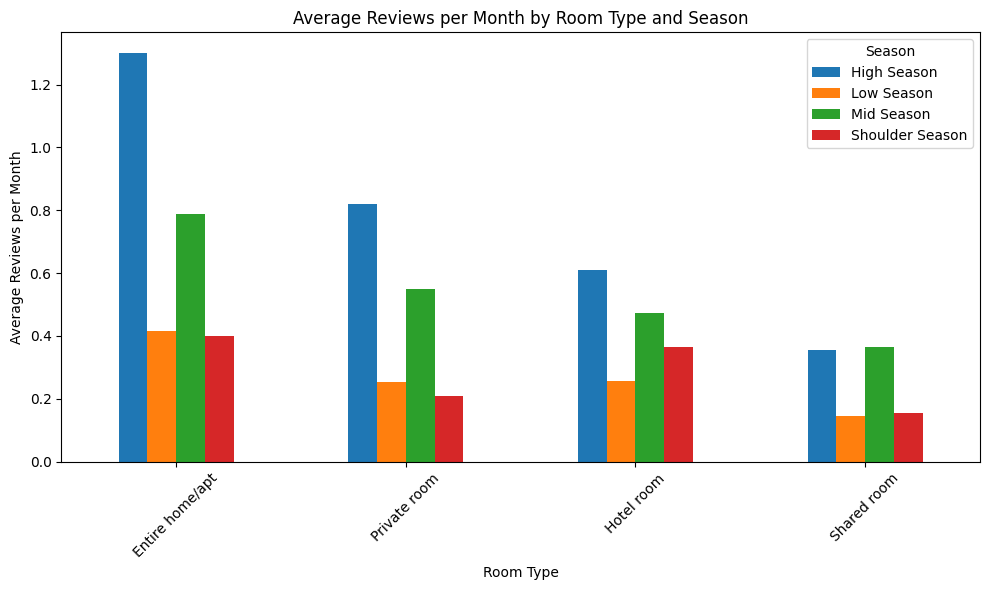

In [68]:
# Sort the room_season_analysis by the highest total reviews per room type
room_season_analysis['Total'] = room_season_analysis.sum(axis=1)
room_season_analysis = room_season_analysis.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Plot bar chart for average reviews_per_month by room type and season
room_season_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Average Reviews per Month by Room Type and Season')
plt.ylabel('Average Reviews per Month')
plt.xlabel('Room Type')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1. **Entire Home/Apartment**:
   - Memiliki rata-rata ulasan tertinggi selama High Season dibandingkan jenis kamar lainnya.
   - Rata-rata ulasan di Low Season, Mid Season, dan Shoulder Season lebih rendah dibandingkan High Season tetapi masih signifikan.

2. **Private Room**:
   - Menempati posisi kedua dengan rata-rata ulasan tinggi selama High Season, tetapi lebih rendah dibandingkan Entire Home/Apartment.
   - Mirip dengan pola Entire Home/Apartment, rata-rata ulasan menurun di Low Season, Mid Season, dan Shoulder Season.

3. **Hotel Room**:
   - Rata-rata ulasannya sedikit lebih rendah daripada Private Room pada High Season.
   - Terdapat pola penurunan yang mirip dengan jenis kamar lainnya saat musim berubah ke Low, Mid, dan Shoulder Seasons.

4. **Shared Room**:
   - Memiliki rata-rata ulasan terendah di setiap musim.
   - Perbedaan antara musim terlihat kurang signifikan dibandingkan jenis kamar lain.


# **4. Conclusion and Recommendation**

## **4.1 Conclusion**

Untuk menentukan harga optimal listing Airbnb di Bangkok, analisis menunjukkan bahwa rentang harga terbaik tergantung pada tipe kamar, seperti "Entire home/apt" di **1.426–2.443 Baht** dan "Private room" di **900–1.426 Baht**, yang sesuai dengan preferensi mayoritas penyewa. Selain itu, keyword seperti "BTS", "Sukhumvit", dan "Pool" menunjukkan bahwa lokasi strategis dan fasilitas lengkap dapat meningkatkan popularitas listing. Selanjutnya, wilayah seperti Khlong Toei dan Vadhana yang memiliki akses transportasi mudah, fasilitas modern, dan daya tarik wisata menjadi area yang paling diminati. Kemudian, pola musiman menunjukkan permintaan tertinggi terjadi pada **Desember-Februari (High Season)**, sehingga listing di area strategis dengan fasilitas unggulan dapat menetapkan harga premium saat itu. Sementara itu, strategi diskon diperlukan pada Low Season untuk tetap menarik penyewa. Dengan demikian, kombinasi antara penyesuaian harga, penggunaan kata kunci yang relevan, fokus pada wilayah populer, dan strategi berbasis musim dapat membantu listing tetap kompetitif dan memaksimalkan pendapatan.

## **4.2 Recommendation**

## **1. Harga optimal**

### Rekomendasi untuk Harga di Bawah Rentang Optimal

pendekatan kenaikan harga bertahap atau kombinasi dengan promosi tambahan dapat membantu mempertahankan tingkat ulasan yang konsisten, memastikan transisi harga tetap kompetitif dan menarik bagi tamu.

### Rekomendasi untuk Harga di Rentang Optimal
Listing yang berada dalam rentang harga optimal sebaiknya mempertahankan harga saat ini dan fokus pada peningkatan kualitas layanan. Selain itu, eksperimen dengan promosi musiman atau diskon khusus seperti "early-bird" atau "last-minute discount" dapat menjaga tingkat pemesanan yang tinggi tanpa perlu perubahan harga signifikan. Pastikan untuk terus memonitor performa ulasan untuk memastikan listing tetap kompetitif.



### Rekomendasi untuk Harga di Atas Rentang Optimal
Listing dengan harga di atas rentang optimal perlu mempertimbangkan penyesuaian harga agar lebih kompetitif. Terapkan diskon strategis untuk mendekati rentang optimal, seperti diskon 10–30%, tergantung pada tingkat sensitivitas tamu terhadap harga. 

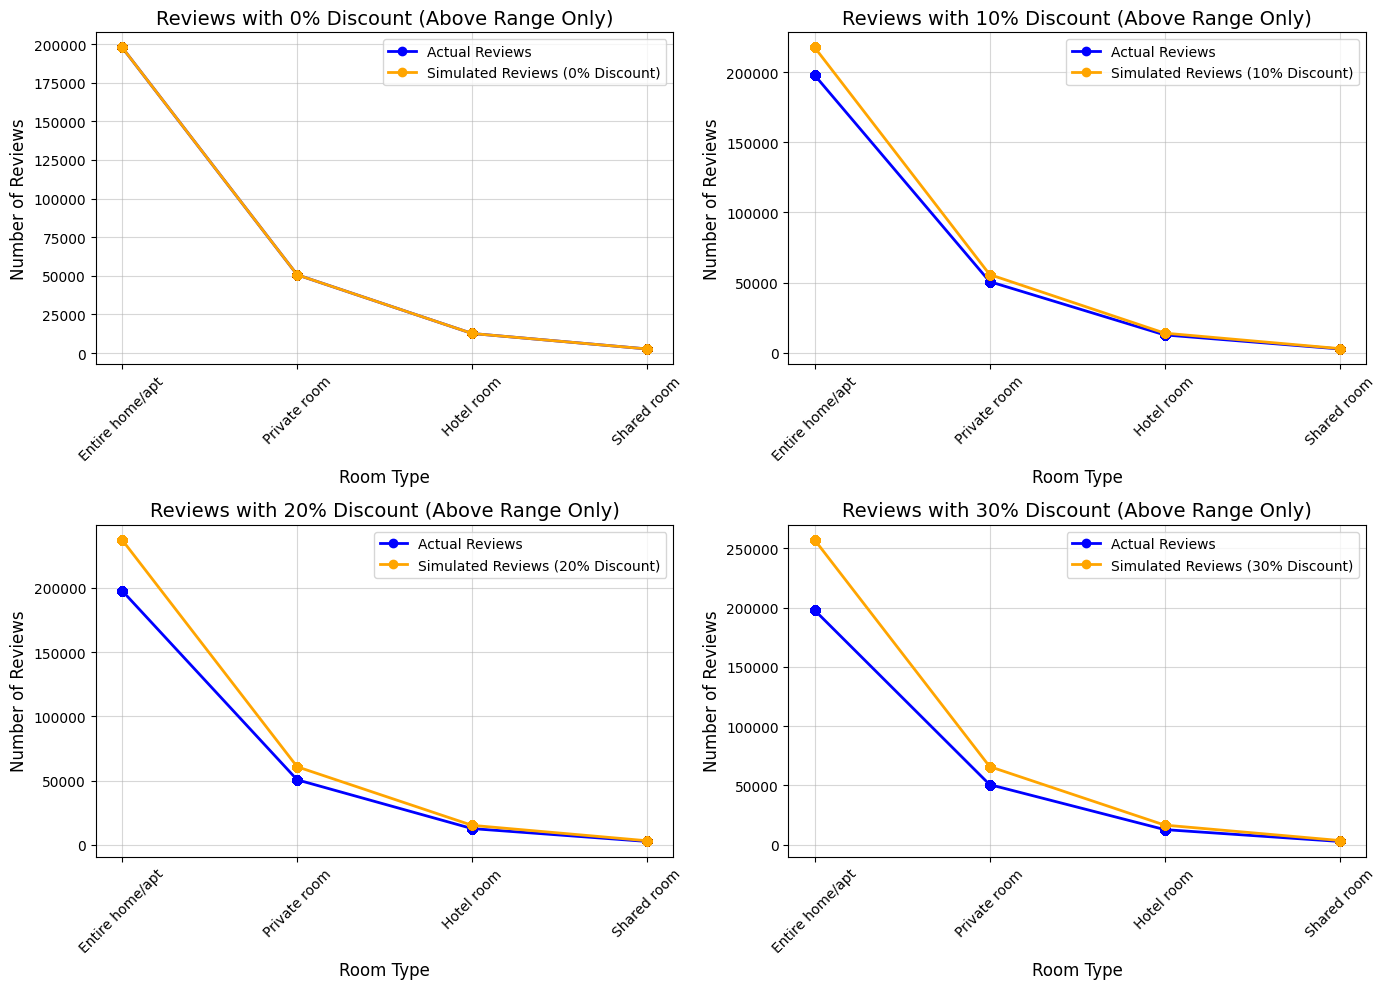

In [144]:

# Ambil data ulasan aktual dari df
actual_reviews_df = df.groupby('room_type')['number_of_reviews'].sum().reset_index()
actual_reviews_df.rename(columns={'number_of_reviews': 'actual_reviews'}, inplace=True)

# Gabungkan actual_reviews ke summary dengan memastikan tidak ada konflik nama kolom
summary = summary.merge(actual_reviews_df, on='room_type', how='left', suffixes=('', '_actual'))

# Jika masih ada konflik, hapus salah satu kolom
if 'actual_reviews_actual' in summary.columns:
    summary['actual_reviews'] = summary['actual_reviews_actual']
    summary.drop(columns=['actual_reviews_actual'], inplace=True)

# Pastikan kolom actual_reviews berhasil digabungkan
if 'actual_reviews' not in summary.columns:
    raise ValueError("Kolom 'actual_reviews' tidak ditemukan setelah proses merge.")

# Menghitung sensitivitas berdasarkan rata-rata ulasan aktual per room_type
sensitivity = summary.groupby('room_type')['actual_reviews'].mean().to_dict()

# Tambahkan kolom sensitivitas ke summary
summary['sensitivity'] = summary['room_type'].map(sensitivity)

# Pisahkan rentang harga dengan memperhatikan kasus khusus "<=" dan ">"
def parse_price_range(price_range):
    if '<=' in price_range:
        upper = float(price_range.replace('<= ', ''))
        return 0, upper
    elif '> ' in price_range:
        lower = float(price_range.replace('> ', ''))
        return lower, float('inf')
    elif ' - ' in price_range:
        lower, upper = map(float, price_range.split(' - '))
        return lower, upper
    else:
        raise ValueError(f"Invalid price range format: {price_range}")

# Terapkan fungsi untuk memproses rentang harga pada `price_range`
summary[['price_lower', 'price_upper']] = summary['price_range'].apply(parse_price_range).apply(pd.Series)

# Langkah 1: Identifikasi listing di atas rentang optimal
summary['price_above_upper'] = summary['price'] > summary['price_upper']

# Langkah 2: Terapkan diskon hanya pada listing yang berada di atas rentang optimal
discounts = [0, 10, 20, 30]  # Diskon dalam persen
results = []

for discount in discounts:
    # Terapkan diskon ke harga listing di atas rentang optimal
    summary['discounted_price'] = summary['price']
    summary.loc[summary['price_above_upper'], 'discounted_price'] *= (1 - discount / 100)

    # Simulasikan peningkatan ulasan berdasarkan diskon
    summary['simulated_reviews'] = summary['actual_reviews'] * (1 + (discount / 100))

    # Simpan hasil
    for _, row in summary.iterrows():
        results.append({
            'room_type': row['room_type'],
            'discount_percentage': discount,
            'actual_reviews': row['actual_reviews'],
            'simulated_reviews': row['simulated_reviews'],
            'sensitivity': row['sensitivity'],
            'price_above_upper': row['price_above_upper']
        })

# Konversi hasil ke DataFrame
simulation_df = pd.DataFrame(results)

# Buat Plot untuk Setiap Diskon
plt.figure(figsize=(14, 10))
for i, discount in enumerate(discounts, 1):
    plt.subplot(2, 2, i)  # Atur subplot 2x2
    discount_data = simulation_df[simulation_df['discount_percentage'] == discount]

    # Plot garis biru untuk Actual Reviews
    plt.plot(discount_data['room_type'], discount_data['actual_reviews'], marker='o', label="Actual Reviews", color='blue', linewidth=2)

    # Plot garis oranye untuk Simulated Reviews
    plt.plot(discount_data['room_type'], discount_data['simulated_reviews'], marker='o', label=f"Simulated Reviews ({discount}% Discount)", color='orange', linewidth=2)

    # Tambahkan detail plot
    plt.title(f"Reviews with {discount}% Discount (Above Range Only)", fontsize=14)
    plt.xlabel('Room Type', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [148]:
import pandas as pd

# Data simulasi (pastikan Anda memiliki `summary` yang benar sebelumnya)
final_table = []

# Diskon yang akan diterapkan
discounts = [0, 10, 20, 30]

for discount in discounts:
    # Simulasikan peningkatan ulasan berdasarkan diskon
    summary['simulated_reviews'] = summary['actual_reviews'] * (1 + (discount / 100))

    # Tambahkan hasil ke tabel
    for _, row in summary.iterrows():
        final_table.append({
            'room_type': row['room_type'],
            'actual_reviews': row['actual_reviews'],
            f'simulated_reviews_{discount}%': row['simulated_reviews']
        })

# Konversi hasil ke DataFrame
final_table_df = pd.DataFrame(final_table)

# Gabungkan hasil untuk setiap diskon dalam satu tabel dengan pivot
columns_to_include = ['actual_reviews'] + [f'simulated_reviews_{discount}%' for discount in discounts]

pivot_table = final_table_df.pivot_table(
    index=['room_type', 'actual_reviews'],
    values=columns_to_include,
    aggfunc='first'
)

# Rapikan header tabel
pivot_table.reset_index(inplace=True)

# Tampilkan hasil tabel
print("=== Tabel Hasil Simulasi Diskon ===")
pivot_table


=== Tabel Hasil Simulasi Diskon ===


,room_type,actual_reviews,simulated_reviews_0%,simulated_reviews_10%,simulated_reviews_20%,simulated_reviews_30%
0,Entire home/apt,197808,197808.0,217588.8,237369.6,257150.4
1,Hotel room,12692,12692.0,13961.2,15230.4,16499.6
2,Private room,50676,50676.0,55743.6,60811.2,65878.8
3,Shared room,2682,2682.0,2950.2,3218.4,3486.6


Berdasarkan hasil simulasi diskon pada listing yang berada di atas harga rentang optimal, berikut adalah beberapa insight yang dapat diambil:

1. **Korelasi Diskon dengan Peningkatan Ulasan**:
   - Dari grafik, terlihat bahwa semakin besar diskon yang diterapkan, semakin signifikan peningkatan jumlah ulasan yang disimulasikan. Ini menunjukkan bahwa tamu cenderung lebih tertarik untuk memesan listing yang sebelumnya berada di atas rentang optimal ketika harga mereka diturunkan melalui diskon.

2. **Efek Diskon pada Kategori Listing**:
   - **Entire home/apt**: Meskipun jumlah ulasan aktual sudah tinggi, pemberian diskon menghasilkan peningkatan ulasan yang signifikan. Ini mengindikasikan bahwa tamu sangat responsif terhadap diskon di kategori ini.
   - **Hotel room dan Private room**: Kategori ini menunjukkan peningkatan ulasan yang cukup besar, terutama pada diskon 20-30%. Hal ini menunjukkan bahwa kategori ini memiliki potensi untuk menarik lebih banyak tamu jika diberi penyesuaian harga yang kompetitif.
   - **Shared room**: Kategori ini memiliki respons peningkatan ulasan yang relatif kecil dibandingkan kategori lain. Hal ini menunjukkan bahwa faktor lain, seperti fasilitas atau pengalaman tamu, mungkin lebih memengaruhi keputusan pemesanan dibandingkan sekadar harga.

3. **Efisiensi Diskon**:
   - Diskon sebesar 10% memberikan peningkatan ulasan yang signifikan tanpa terlalu banyak menurunkan harga listing. Namun, pada diskon 20% dan 30%, meskipun jumlah ulasan meningkat lebih tinggi, dampak terhadap margin keuntungan harus diperhitungkan.

4. **Rekomendasi Strategi**:
   - **Entire home/apt**: Penerapan diskon hingga 20% dapat menjadi strategi optimal untuk menarik lebih banyak tamu tanpa terlalu banyak mengorbankan margin keuntungan.
   - **Hotel room dan Private room**: Diskon yang lebih besar, hingga 30%, mungkin diperlukan untuk meningkatkan daya tarik listing di kategori ini, terutama jika ulasan sebelumnya tidak cukup menarik perhatian.
   - **Shared room**: Diskon kecil (10%) atau fokus pada peningkatan fasilitas mungkin lebih efektif daripada menurunkan harga secara signifikan.

Kesimpulannya, penerapan diskon memberikan dampak yang signifikan pada peningkatan ulasan, terutama pada kategori listing yang memiliki harga di atas rentang optimal. Namun, strategi diskon harus disesuaikan dengan kategori dan sensitivitas harga masing-masing listing untuk mengoptimalkan hasil.

## **2. Keyword yang Mempengaruhi**

Rata-rata jumlah review (dengan keyword): 21.545077204051136
Rata-rata jumlah review (tanpa keyword): 13.70103198119955
T-test: t-stat = 11.883811757343752, p-value = 2.1184177346635077e-32


<Figure size 800x600 with 0 Axes>

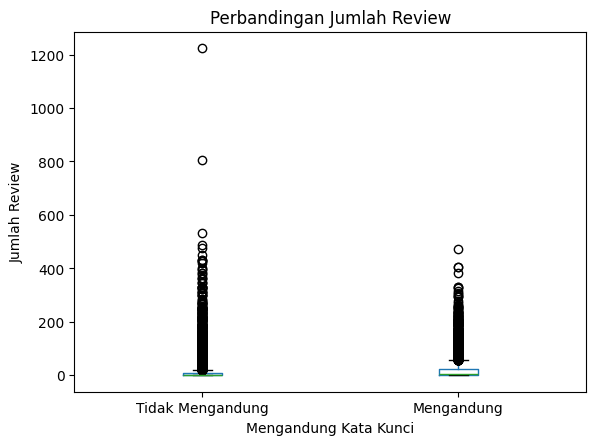

In [154]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Daftar kata kunci dari wordcloud
keywords = ["Sukhumvit", "Paragon", "Pratunam", "Sathorn", "Silom", "Siam",
            "Lumpini", "Surasak", "BTS", "Station", "Pool", "Gym", "Balcony",
            "Wifi", "Market", "Park", "Shanti"]

# Tambahkan kolom 'contains_keyword' (True jika mengandung salah satu kata kunci)
df['contains_keyword'] = df['name'].apply(lambda x: any(keyword in str(x) for keyword in keywords))

# Pisahkan listing menjadi dua kelompok berdasarkan keberadaan kata kunci
group_with_keywords = df[df['contains_keyword'] == True]['number_of_reviews']
group_without_keywords = df[df['contains_keyword'] == False]['number_of_reviews']

# Hitung rata-rata jumlah review
mean_with_keywords = group_with_keywords.mean()
mean_without_keywords = group_without_keywords.mean()

print(f"Rata-rata jumlah review (dengan keyword): {mean_with_keywords}")
print(f"Rata-rata jumlah review (tanpa keyword): {mean_without_keywords}")

# Lakukan T-test untuk memeriksa signifikansi
t_stat, p_value = ttest_ind(group_with_keywords, group_without_keywords, equal_var=False)
print(f"T-test: t-stat = {t_stat}, p-value = {p_value}")

# Visualisasi dengan boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='number_of_reviews', by='contains_keyword', grid=False)
plt.title('Perbandingan Jumlah Review')
plt.suptitle('')
plt.xlabel('Mengandung Kata Kunci')
plt.ylabel('Jumlah Review')
plt.xticks([1, 2], ['Tidak Mengandung', 'Mengandung'])
plt.show();


### **Formulasi Hipotesis**
- **H0 (Hipotesis Nol):** Tidak ada perbedaan rata-rata jumlah review antara listing yang mengandung kata kunci dan yang tidak mengandung kata kunci.
- **H1 (Hipotesis Alternatif):** Ada perbedaan rata-rata jumlah review antara listing yang mengandung kata kunci dan yang tidak mengandung kata kunci.

### **Hasil Uji Statistik**
- **Rata-rata jumlah review:**
  - Listing **mengandung kata kunci**: **21,55**.
  - Listing **tidak mengandung kata kunci**: **13,70**.
- **Hasil T-Test**:
  - **t-statistik**: **11,88**.
  - **p-value**: **2,11e-32**.

### **Keputusan**
Karena **p-value** jauh lebih kecil dari 0,05, maka **tolak H0**. Ini berarti bahwa terdapat perbedaan yang signifikan secara statistik antara rata-rata jumlah review listing yang mengandung kata kunci dan yang tidak mengandung kata kunci.

### **Boxplot:**

Distribusi jumlah review untuk listing yang mengandung kata kunci lebih tinggi dibandingkan dengan yang tidak. Ini terlihat dari median yang lebih tinggi dan adanya beberapa outlier dengan jumlah review yang sangat tinggi di kelompok ini.

### **Insight**
- Listing yang **mengandung kata kunci** seperti "Sukhumvit," "BTS," "Station," "Pool," "Wifi," dan lainnya memiliki rata-rata jumlah review yang lebih tinggi.
- Kata kunci yang relevan dapat meningkatkan eksposur dan daya tarik listing terhadap calon penyewa.

### **Rekomendasi**
1. **Listing di Lokasi Strategis**: Pemilik listing di lokasi strategis seperti "Sukhumvit" atau dekat dengan transportasi umum (misalnya "BTS," "Station") harus mencantumkan kata kunci tersebut untuk meningkatkan visibilitas dan jumlah review.
2. **Highlight Fasilitas**: Kata kunci terkait fasilitas seperti "Pool," "Wifi," atau "Balcony" juga dapat ditonjolkan jika memang tersedia.
3. **Peningkatan Strategis**: Pemilik listing di lokasi non-strategis dapat menambahkan fitur atau fasilitas tertentu untuk menarik perhatian lebih dan meningkatkan daya saing.


## **3. wilayah terlaku**

### Rekomendasi untuk **Top 5 Neighborhoods**
1. **Tingkatkan Eksposur Wilayah Populer**:
   - Listing di wilayah **top 5** seperti `Khlong Toei`, `Vadhana`, `Sathon`, `Ratchathewi`, dan `Huai Khwang` sebaiknya dimanfaatkan untuk menarik perhatian calon tamu. Anda dapat mendorong pemilik listing untuk menambahkan *keywords* yang sesuai dengan preferensi wisatawan (misalnya: "Dekat BTS", "Pusat Kota", "Akses Mudah ke Landmark").
   - Listing di wilayah ini juga dapat diberikan fitur premium di platform (jika memungkinkan), seperti "rekomendasi teratas" atau "tampil di halaman depan."

2. **Optimalkan Deskripsi dan Foto Listing**:
   - Pastikan deskripsi dan foto mencerminkan keunggulan wilayah. Sebagai contoh:
     - Untuk listing di **Khlong Toei**, soroti keunggulan seperti dekatnya dengan pasar dan akses transportasi.
     - Untuk **Sathon**, tonjolkan kemewahan dan fasilitas untuk pelancong bisnis.
   - Dorong pemilik listing untuk menyertakan ulasan positif atau testimoni tentang lokasi mereka.

3. **Penambahan Fasilitas untuk Menarik Ulasan**:
   - Listing di wilayah ini dapat ditingkatkan dengan menambahkan fasilitas tambahan seperti Wi-Fi berkecepatan tinggi, kolam renang, atau akses gym, yang terbukti menjadi daya tarik utama wisatawan.

---

### Rekomendasi untuk **Wilayah di Luar Top 5**
1. **Promosikan Wilayah Baru dengan Potensi**:
   - Untuk wilayah yang belum masuk dalam *top 5*, soroti potensi unik dari masing-masing lokasi. Misalnya, wilayah yang memiliki nilai budaya atau pemandangan alam yang menarik dapat dipromosikan sebagai destinasi alternatif.
   - Berikan informasi tentang atraksi lokal, pasar tradisional, atau pengalaman budaya.

2. **Optimasi Harga Kompetitif**:
   - Untuk listing di wilayah di luar *top 5*, berikan rekomendasi harga kompetitif tanpa mengorbankan kualitas. Pemilik listing dapat mempertahankan harga dengan menonjolkan nilai lebih seperti kenyamanan, layanan pelanggan, atau ulasan positif.

3. **Peningkatan Interaksi dengan Tamu**:
   - Listing di luar *top 5* dapat meningkatkan ulasan positif dengan memberikan pelayanan yang luar biasa, seperti tanggapan cepat terhadap tamu, menawarkan pengalaman lokal unik (misalnya, tur pribadi), atau memberikan panduan wisata kepada tamu.


## **4. Pola Musiman**

**Strategi Diskon Musiman**: Selama **Low Season (Juni-September)**, tawarkan diskon, paket spesial, atau fasilitas tambahan seperti gratis sarapan untuk meningkatkan pemesanan.  

**Promosi untuk Shared Room**: Untuk listing dengan harga rendah seperti *Shared Room*, gunakan strategi pemasaran digital atau bundling dengan layanan lain, misalnya tur lokal, untuk meningkatkan jumlah penyewa.  

**Penyesuaian Berdasarkan Pola Musiman**: Mulai tingkatkan promosi pada **Mid Season (Oktober-November)** sebagai persiapan menghadapi permintaan tinggi di akhir tahun.  

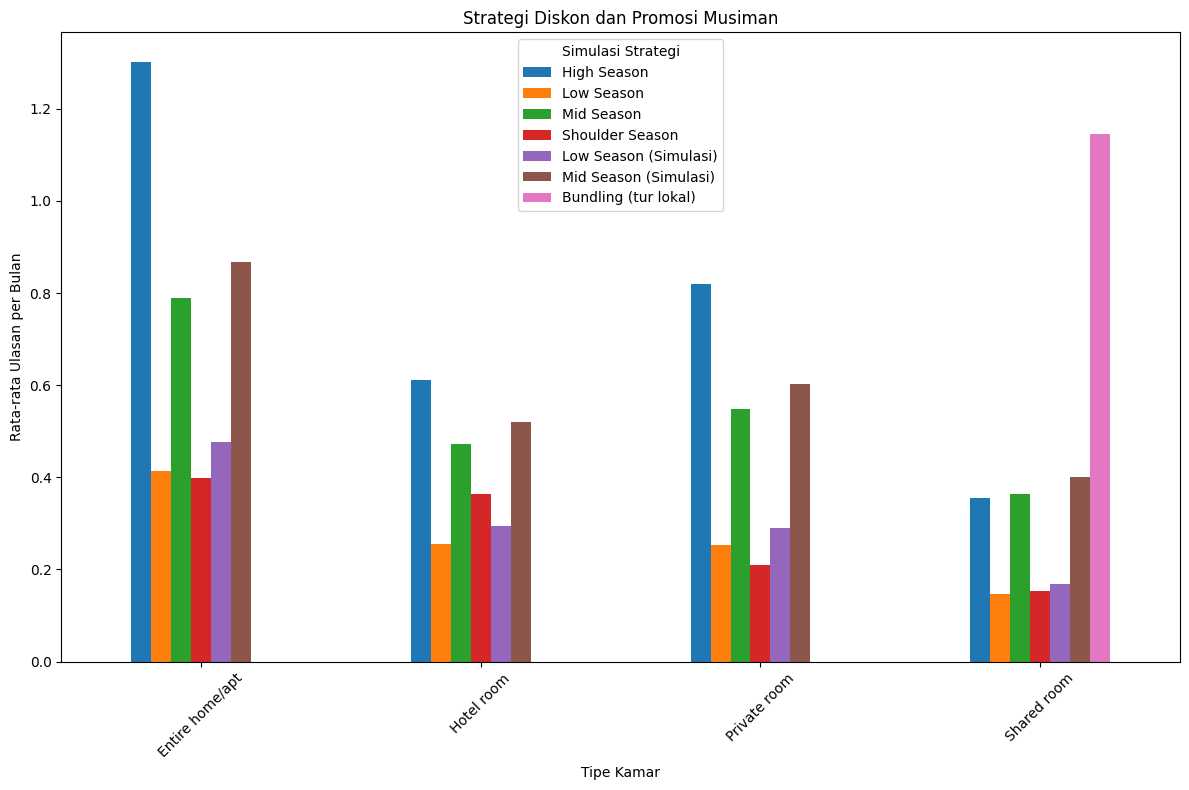


=== Rekomendasi ===
Tawarkan diskon 15% selama Low Season untuk meningkatkan pemesanan. Simulasi menunjukkan rata-rata ulasan meningkat sekitar 0.04 ulasan per bulan.
Tingkatkan promosi untuk mempersiapkan High Season. Simulasi menunjukkan rata-rata ulasan meningkat sekitar 0.05 ulasan per bulan.
Gunakan strategi pemasaran digital dan bundling dengan layanan tur lokal.


In [167]:

# Langkah 1: Mengelompokkan rata-rata ulasan per musim dan tipe kamar
room_season_analysis = df.groupby(['room_type', 'season'])['reviews_per_month'].mean().unstack()

# Langkah 2: Simulasi strategi diskon musiman
# Menyiapkan strategi untuk setiap musim
strategies = {
    'Low Season': {
        'type': 'diskon',
        'value': 15,  # Diskon 15%
        'message': 'Tawarkan diskon 15% selama Low Season untuk meningkatkan pemesanan.'
    },
    'Mid Season': {
        'type': 'promosi',
        'value': 10,  # Promosi seperti gratis sarapan atau tambahan fasilitas
        'message': 'Tingkatkan promosi untuk mempersiapkan High Season.'
    },
    'Shared Room': {
        'type': 'bundling',
        'value': 'tur lokal',  # Strategi bundling
        'message': 'Gunakan strategi pemasaran digital dan bundling dengan layanan tur lokal.'
    }
}

# Langkah 3: Menambahkan simulasi dampak diskon/promosi
for season, strategy in strategies.items():
    if season == 'Shared Room':
        # Strategi khusus untuk Shared Room
        room_season_analysis.loc['Shared room', f'Bundling ({strategy["value"]})'] = \
            room_season_analysis.loc['Shared room', 'Low Season'] + 1  # Simulasi bundling meningkatkan ulasan
    else:
        # Diskon/promosi musiman
        discount_factor = 1 + (strategy['value'] / 100)
        room_season_analysis[f'{season} (Simulasi)'] = \
            room_season_analysis[season] * discount_factor if season in room_season_analysis else None

# Langkah 4: Visualisasi
room_season_analysis.plot(kind='bar', figsize=(12, 8))
plt.title('Strategi Diskon dan Promosi Musiman')
plt.ylabel('Rata-rata Ulasan per Bulan')
plt.xlabel('Tipe Kamar')
plt.legend(title='Simulasi Strategi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Langkah 5: Rekomendasi berdasarkan strategi
recommendations = []
for season, strategy in strategies.items():
    if season == 'Shared Room':
        recommendations.append(strategy['message'])
    else:
        avg_increase = room_season_analysis[f'{season} (Simulasi)'].mean() - room_season_analysis[season].mean()
        recommendations.append(f"{strategy['message']} Simulasi menunjukkan rata-rata ulasan meningkat sekitar {avg_increase:.2f} ulasan per bulan.")

# Menampilkan rekomendasi
print("\n=== Rekomendasi ===")
for rec in recommendations:
    print(rec)



### Penjelasan Kode
1. **Strategi Diskon Musiman**: Diskon 15% untuk *Low Season* disimulasikan dengan menambahkan peningkatan ulasan secara proporsional.
2. **Promosi Mid Season**: Menambahkan simulasi promosi pada *Mid Season* untuk persiapan permintaan akhir tahun.
3. **Shared Room**: Bundling dengan layanan tambahan (seperti tur lokal) disimulasikan dengan peningkatan kecil pada ulasan.


Pemikiran untuk menggunakan **bundling dengan tur lokal** berasal dari pendekatan **strategi pemasaran berbasis nilai tambah** (value-added marketing strategy). Berikut adalah teori dan logikanya:

---

### **Teori yang Mendukung:**
1. **Value-Added Services**:  
   Strategi pemasaran ini menekankan penambahan layanan tambahan untuk meningkatkan daya tarik sebuah produk atau jasa. Dalam konteks *Shared Room* yang memiliki harga rendah dan ulasan yang terbatas, menawarkan layanan tambahan seperti tur lokal dapat memberikan nilai lebih bagi tamu tanpa menaikkan harga dasar secara signifikan.

   > **Sumber Teori**: 
   - Kotler & Keller (2016): *Marketing Management*, mengenai pentingnya menonjolkan keunikan produk melalui nilai tambah.
   - Zeithaml et al. (1996): *Services Marketing*, yang menggarisbawahi pentingnya layanan tambahan dalam memengaruhi kepuasan pelanggan.

2. **Behavioral Economics - Bundling**:  
   Bundling adalah strategi yang menggabungkan dua atau lebih produk/jasa untuk menciptakan nilai yang dirasakan lebih tinggi dibandingkan membeli produk secara terpisah. Dalam kasus ini, bundling *Shared Room* dengan tur lokal dapat menarik wisatawan yang mencari pengalaman hemat sekaligus bermakna.

   > **Sumber Teori**:  
   - Stremersch & Tellis (2002): *Strategic Bundling of Products and Prices: A New Synthesis for Marketing*.  
   - Guiltinan (1987): *The Price Bundling of Services: A Normative Framework*.

3. **Customer Experience Management (CEM)**:  
   Dalam konteks wisata, banyak tamu mencari pengalaman otentik selain akomodasi. Tur lokal menawarkan pengalaman berbasis budaya dan lokasi, yang dapat meningkatkan nilai persepsi terhadap *Shared Room* yang harganya terjangkau.  

   > **Sumber Teori**:  
   - Pine & Gilmore (1999): *The Experience Economy*, yang menekankan bahwa pelanggan membayar untuk pengalaman, bukan hanya produk/jasa.  

---

### **Logika Strategi:**
1. **Shared Room Cenderung Disewa oleh Wisatawan Budget-Friendly**:  
   Wisatawan yang memilih *Shared Room* biasanya ingin menghemat biaya, tetapi tetap mencari pengalaman. Bundling tur lokal yang murah atau gratisan menjadi opsi menarik untuk meningkatkan daya saing listing ini.

2. **Menarik Minat pada *Low-Engagement Properties***:  
   Listing *Shared Room* sering kali tidak memiliki banyak ulasan atau daya tarik tambahan. Dengan menggabungkan layanan tambahan seperti tur lokal, listing ini dapat terlihat lebih menarik dibanding kompetitor.

3. **Efisiensi Biaya**:  
   Bundling tur lokal tidak membutuhkan biaya tambahan yang besar. Banyak pemilik properti dapat bekerja sama dengan operator tur lokal atau bahkan menawarkan panduan pribadi berdasarkan pengalaman lokal mereka.
